In [ ]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
%matplotlib inline

In [10]:
plotproperties = {
    'font.size': 13,
    'axes.titlesize': 'xx-large',
    'axes.labelsize': 'xx-large',
    'xtick.labelsize': 'xx-large',
    'xtick.major.size': 7,
    'xtick.minor.size': 5,
    'ytick.labelsize': 'xx-large',
    'ytick.major.size': 7,
    'ytick.minor.size': 5,
    'legend.fontsize': 'x-large',
    'lines.markersize': 3,
    'figure.figsize': (7, 6),
    'savefig.format': 'pdf',
    'savefig.dpi': 300}

matplotlib.rcParams.update(plotproperties)

In [3]:
path = '/mnt/2646BAF446BAC3B9/Data/optical_flow/eventrates'
path_eventrates = os.path.join(path, 'eventrates.txt')

In [4]:
times, eventrates = np.loadtxt(path_eventrates, usecols=(1, 2), unpack=True)
eventrates *= 1e-3  # Hz to kHz 
times -= times[0]
times /= 1000  # ms to s

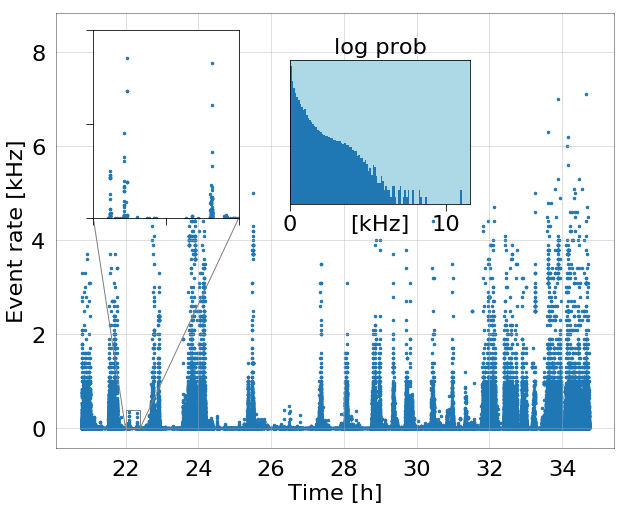

In [12]:
idxs = range(200000, 300000)
idxs_inset = range(200000, 300000)
fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(times[idxs] / 3600, eventrates[idxs], marker='.', s=25)

axins = zoomed_inset_axes(ax, 10, loc=9, bbox_to_anchor=[200, 500])
axins.scatter(times[idxs_inset] / 3600, eventrates[idxs_inset], marker='.', s=25)
plt.xticks(visible=False)
plt.yticks(visible=False)
axins.set_xlim(22, 22.4)
axins.set_ylim(0, 0.4)
axins.xaxis.get_major_locator().set_params(nbins=2)
axins.yaxis.get_major_locator().set_params(nbins=2)
mark_inset(ax, axins, loc1=3, loc2=4, ec='0.5')

plt.axes([0.45, 0.55, 0.25, 0.25], facecolor='lightblue')
plt.hist(eventrates, int(np.sqrt(len(eventrates)) / 8), log=True, density=True)
plt.title('log prob')
# plt.xticks([])
plt.yticks([])
plt.xlabel('[kHz]', labelpad=-20)
plt.xlim(0, None)

ax.tick_params(axis='both', which='both', bottom=False, left=False)
ax.grid(alpha=0.5)
matplotlib.rcParams['grid.alpha'] = 0.5
ax.spines['top'].set_alpha(0.5)
ax.spines['right'].set_alpha(0.5)
ax.spines['bottom'].set_alpha(0.5)
ax.spines['left'].set_alpha(0.5)
    
ax.set_xlim(None, None)
ax.set_ylim(None, None)
ax.set_xlabel('Time [h]')
ax.set_ylabel('Event rate [kHz]')
fig.savefig(os.path.join(path, 'eventrate'))

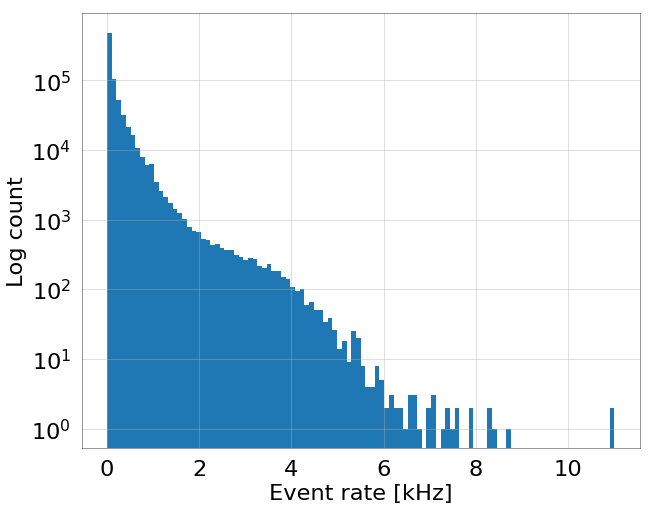

In [45]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

ax.hist(eventrates, int(np.sqrt(len(eventrates)) / 8), log=True)

ax.tick_params(axis='both', which='both', bottom=False, left=False)
ax.grid(alpha=0.5)
matplotlib.rcParams['grid.alpha'] = 0.5
ax.spines['top'].set_alpha(0.5)
ax.spines['right'].set_alpha(0.5)
ax.spines['bottom'].set_alpha(0.5)
ax.spines['left'].set_alpha(0.5)
    
ax.set_xlim(None, None)
ax.set_ylim(None, None)
ax.set_xlabel('Event rate [kHz]')
ax.set_ylabel('Log count')
fig.savefig(os.path.join(path, 'eventrate_hist'))